In [4]:
from __future__ import division
from numpy.random import randn
import numpy as np
import os
import matplotlib.pyplot as plt
np.random.seed(12345)
plt.rc('figure', figsize=(10, 6))
from pandas import Series, DataFrame
import pandas as pd
np.set_printoptions(precision=4, threshold=500)
pd.options.display.max_rows = 100

In [5]:
%matplotlib inline

In [6]:
df1 = DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'a', 'b'],
                'data1': range(7)})

In [7]:
df2 = DataFrame({'key': ['a', 'b', 'd'],
                'data2': range(3)})

In [8]:
df1

data1 key
0      0   b
1      1   b
2      2   a
3      3   c
4      4   a
5      5   a
6      6   b

In [9]:
df2

data2 key
0      0   a
1      1   b
2      2   d

In [10]:
pd.merge(df1, df2)

data1 key  data2
0      0   b      1
1      1   b      1
2      6   b      1
3      2   a      0
4      4   a      0
5      5   a      0

In [11]:
pd.merge(df2, df1)

data2 key  data1
0      0   a      2
1      0   a      4
2      0   a      5
3      1   b      0
4      1   b      1
5      1   b      6

In [12]:
pd.merge(df1, df2, on='key')

data1 key  data2
0      0   b      1
1      1   b      1
2      6   b      1
3      2   a      0
4      4   a      0
5      5   a      0

In [13]:
df3 = DataFrame({'lkey': ['b', 'b', 'a', 'c', 'a', 'a', 'b'],
                 'data1': range(7)})
df4 = DataFrame({'rkey': ['a', 'b', 'd'],
                 'data2': range(3)})

In [14]:
df3

data1 lkey
0      0    b
1      1    b
2      2    a
3      3    c
4      4    a
5      5    a
6      6    b

In [15]:
df4

data2 rkey
0      0    a
1      1    b
2      2    d

In [16]:
pd.merge(df3, df4, left_on='lkey', right_on='rkey')

data1 lkey  data2 rkey
0      0    b      1    b
1      1    b      1    b
2      6    b      1    b
3      2    a      0    a
4      4    a      0    a
5      5    a      0    a

In [17]:
pd.merge(df1, df2, how='outer')

data1 key  data2
0      0   b      1
1      1   b      1
2      6   b      1
3      2   a      0
4      4   a      0
5      5   a      0
6      3   c    NaN
7    NaN   d      2

In [18]:
df1 = DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'b'],
                 'data1': range(6)})
df2 = DataFrame({'key': ['a', 'b', 'a', 'b', 'd'],
                 'data2': range(5)})

In [19]:
df1

data1 key
0      0   b
1      1   b
2      2   a
3      3   c
4      4   a
5      5   b

In [20]:
df2

data2 key
0      0   a
1      1   b
2      2   a
3      3   b
4      4   d

In [21]:
pd.merge(df1, df2, on='key', how='left')

data1 key  data2
0       0   b      1
1       0   b      3
2       1   b      1
3       1   b      3
4       2   a      0
5       2   a      2
6       3   c    NaN
7       4   a      0
8       4   a      2
9       5   b      1
10      5   b      3

In [22]:
pd.merge(df1, df2)

data1 key  data2
0      0   b      1
1      0   b      3
2      1   b      1
3      1   b      3
4      5   b      1
5      5   b      3
6      2   a      0
7      2   a      2
8      4   a      0
9      4   a      2

In [23]:
pd.merge(df1, df2, how='inner')

data1 key  data2
0      0   b      1
1      0   b      3
2      1   b      1
3      1   b      3
4      5   b      1
5      5   b      3
6      2   a      0
7      2   a      2
8      4   a      0
9      4   a      2

In [24]:
left = DataFrame({'key1': ['foo', 'foo', 'bar'],
                  'key2': ['one', 'two', 'one'],
                  'lval': [1, 2, 3]})
right = DataFrame({'key1': ['foo', 'foo', 'bar', 'bar'],
                   'key2': ['one', 'one', 'one', 'two'],
                   'rval': [4, 5, 6, 7]})

In [26]:
pd.merge(left, right, on=['key1', 'key2'], how='outer')

key1 key2  lval  rval
0  foo  one     1     4
1  foo  one     1     5
2  foo  two     2   NaN
3  bar  one     3     6
4  bar  two   NaN     7

In [27]:
left

key1 key2  lval
0  foo  one     1
1  foo  two     2
2  bar  one     3

In [28]:
right

key1 key2  rval
0  foo  one     4
1  foo  one     5
2  bar  one     6
3  bar  two     7

In [29]:
pd.merge(left, right, on='key1')

key1 key2_x  lval key2_y  rval
0  foo    one     1    one     4
1  foo    one     1    one     5
2  foo    two     2    one     4
3  foo    two     2    one     5
4  bar    one     3    one     6
5  bar    one     3    two     7

In [30]:
pd.merge(left, right, on='key1', suffixes=('_left', '_right'))

key1 key2_left  lval key2_right  rval
0  foo       one     1        one     4
1  foo       one     1        one     5
2  foo       two     2        one     4
3  foo       two     2        one     5
4  bar       one     3        one     6
5  bar       one     3        two     7

In [31]:
left1 = DataFrame({'key': ['a', 'b', 'a', 'a', 'b', 'c'],
                  'value': range(6)})
right1 = DataFrame({'group_val': [3.5, 7]}, index=['a', 'b'])

In [32]:
left1

key  value
0   a      0
1   b      1
2   a      2
3   a      3
4   b      4
5   c      5

In [33]:
right1

group_val
a        3.5
b        7.0

In [34]:
pd.merge(left1, right1, left_on='key', right_index=True)

key  value  group_val
0   a      0        3.5
2   a      2        3.5
3   a      3        3.5
1   b      1        7.0
4   b      4        7.0

In [35]:
pd.merge(left1, right1, left_on='key', right_index=True, how='outer')

key  value  group_val
0   a      0        3.5
2   a      2        3.5
3   a      3        3.5
1   b      1        7.0
4   b      4        7.0
5   c      5        NaN

In [36]:
lefth = DataFrame({'key1': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada'],
                   'key2': [2000, 2001, 2002, 2001, 2002],
                   'data': np.arange(5.)})
righth = DataFrame(np.arange(12).reshape((6, 2)),
                   index=[['Nevada', 'Nevada', 'Ohio', 'Ohio', 'Ohio', 'Ohio'],
                          [2001, 2000, 2000, 2000, 2001, 2002]],
                   columns=['event1', 'event2'])
lefth

data    key1  key2
0     0    Ohio  2000
1     1    Ohio  2001
2     2    Ohio  2002
3     3  Nevada  2001
4     4  Nevada  2002

In [37]:
righth

event1  event2
Nevada 2001       0       1
       2000       2       3
Ohio   2000       4       5
       2000       6       7
       2001       8       9
       2002      10      11

In [38]:
pd.merge(lefth, righth, left_on=['key1', 'key2'], right_index=True)

data    key1  key2  event1  event2
0     0    Ohio  2000       4       5
0     0    Ohio  2000       6       7
1     1    Ohio  2001       8       9
2     2    Ohio  2002      10      11
3     3  Nevada  2001       0       1

In [39]:
pd.merge(lefth, righth, left_on=['key1', 'key2'],
         right_index=True, how='outer')

data    key1  key2  event1  event2
0     0    Ohio  2000       4       5
0     0    Ohio  2000       6       7
1     1    Ohio  2001       8       9
2     2    Ohio  2002      10      11
3     3  Nevada  2001       0       1
4     4  Nevada  2002     NaN     NaN
4   NaN  Nevada  2000       2       3

In [40]:
left2 = DataFrame([[1., 2.], [3., 4.], [5., 6.]], index=['a', 'c', 'e'],
                 columns=['Ohio', 'Nevada'])
right2 = DataFrame([[7., 8.], [9., 10.], [11., 12.], [13, 14]],
                   index=['b', 'c', 'd', 'e'], columns=['Missouri', 'Alabama'])

In [41]:
left2

Ohio  Nevada
a     1       2
c     3       4
e     5       6

In [42]:
right2

Missouri  Alabama
b         7        8
c         9       10
d        11       12
e        13       14

In [43]:
pd.merge(left2, right2, how='outer', left_index=True, right_index=True)

Ohio  Nevada  Missouri  Alabama
a     1       2       NaN      NaN
b   NaN     NaN         7        8
c     3       4         9       10
d   NaN     NaN        11       12
e     5       6        13       14

In [44]:
left2.join(right2, how='outer')

Ohio  Nevada  Missouri  Alabama
a     1       2       NaN      NaN
b   NaN     NaN         7        8
c     3       4         9       10
d   NaN     NaN        11       12
e     5       6        13       14

In [45]:
left1.join(right1, on='key')

key  value  group_val
0   a      0        3.5
1   b      1        7.0
2   a      2        3.5
3   a      3        3.5
4   b      4        7.0
5   c      5        NaN

In [55]:
pd.merge(left1, right1, left_on='key', right_index=True, how='inner')

key  value  group_val
0   a      0        3.5
2   a      2        3.5
3   a      3        3.5
1   b      1        7.0
4   b      4        7.0
5   c      5        NaN

In [56]:
another = DataFrame([[7., 8.], [9., 10.], [11., 12.], [16., 17.]],
                    index=['a', 'c', 'e', 'f'], columns=['New York', 'Oregon'])

In [59]:
left2.join([right2, another])

Ohio  Nevada  Missouri  Alabama  New York  Oregon
a     1       2       NaN      NaN         7       8
c     3       4         9       10         9      10
e     5       6        13       14        11      12

In [60]:
left2

Ohio  Nevada
a     1       2
c     3       4
e     5       6

In [61]:
right2

Missouri  Alabama
b         7        8
c         9       10
d        11       12
e        13       14

In [62]:
another

New York  Oregon
a         7       8
c         9      10
e        11      12
f        16      17

In [63]:
left2.join([right2, another], how='outer')

Ohio  Nevada  Missouri  Alabama  New York  Oregon
a     1       2       NaN      NaN         7       8
b   NaN     NaN         7        8       NaN     NaN
c     3       4         9       10         9      10
d   NaN     NaN        11       12       NaN     NaN
e     5       6        13       14        11      12
f   NaN     NaN       NaN      NaN        16      17

In [64]:
arr = np.arange(12).reshape((3,4))

In [65]:
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [68]:
np.concatenate([arr, arr], axis=1)

array([[ 0,  1,  2,  3,  0,  1,  2,  3],
       [ 4,  5,  6,  7,  4,  5,  6,  7],
       [ 8,  9, 10, 11,  8,  9, 10, 11]])

In [69]:
s1 = Series([0, 1], index=['a', 'b'])
s2 = Series([2, 3, 4], index=['c', 'd', 'e'])
s3 = Series([5, 6], index=['f', 'g'])

In [74]:
pd.concat([s1, s2, s3])

a    0
b    1
c    2
d    3
e    4
f    5
g    6
dtype: int64

In [76]:
s4 = pd.concat([s1 * 4, s3])

In [77]:
pd.concat([s1, s4], axis=1)

0  1
a   0  0
b   1  4
f NaN  5
g NaN  6

In [80]:
pd.concat([s1, s4], axis=1, join='inner')

0  1
a  0  0
b  1  4

In [81]:
pd.concat([s1, s4], axis=1, join_axes=[['a', 'c', 'b', 'e']])

0   1
a   0   0
c NaN NaN
b   1   4
e NaN NaN

In [82]:
result = pd.concat([s1, s1, s3], keys=['one', 'two', 'three'])

In [83]:
result

one    a    0
       b    1
two    a    0
       b    1
three  f    5
       g    6
dtype: int64

In [84]:
result.unstack()

a   b   f   g
one     0   1 NaN NaN
two     0   1 NaN NaN
three NaN NaN   5   6

In [85]:
pd.concat([s1, s2, s3], axis=1, keys=['one', 'two', 'three'])

one  two  three
a    0  NaN    NaN
b    1  NaN    NaN
c  NaN    2    NaN
d  NaN    3    NaN
e  NaN    4    NaN
f  NaN  NaN      5
g  NaN  NaN      6

In [86]:
df1 = DataFrame(np.arange(6).reshape(3, 2), index=['a', 'b', 'c'],
                columns=['one', 'two'])
df2 = DataFrame(5 + np.arange(4).reshape(2, 2), index=['a', 'c'],
                columns=['three', 'four'])

In [87]:
pd.concat([df1, df2], axis=1, keys=['level1', 'level2'])

level1     level2     
     one two  three four
a      0   1      5    6
b      2   3    NaN  NaN
c      4   5      7    8

In [88]:
pd.concat({'level1': df1, 'level2': df2}, axis=1)

level1     level2     
     one two  three four
a      0   1      5    6
b      2   3    NaN  NaN
c      4   5      7    8

In [89]:
pd.concat([df1, df2], axis=1, keys=['level1', 'level2'], names=['upper', 'lower'])

upper level1     level2     
lower    one two  three four
a          0   1      5    6
b          2   3    NaN  NaN
c          4   5      7    8

In [90]:
df1 = DataFrame(np.random.randn(3, 4), columns=['a', 'b', 'c', 'd'])
df2 = DataFrame(np.random.randn(2, 3), columns=['b', 'd', 'a'])

In [91]:
df1

a         b         c         d
0 -0.204708  0.478943 -0.519439 -0.555730
1  1.965781  1.393406  0.092908  0.281746
2  0.769023  1.246435  1.007189 -1.296221

In [92]:
df2

b         d         a
0  0.274992  0.228913  1.352917
1  0.886429 -2.001637 -0.371843

In [93]:
pd.concat([df1, df2], ignore_index=True)

a         b         c         d
0 -0.204708  0.478943 -0.519439 -0.555730
1  1.965781  1.393406  0.092908  0.281746
2  0.769023  1.246435  1.007189 -1.296221
3  1.352917  0.274992       NaN  0.228913
4 -0.371843  0.886429       NaN -2.001637

In [94]:
a = Series([np.nan, 2.5, np.nan, 3.5, 4.5, np.nan],
           index=['f', 'e', 'd', 'c', 'b', 'a'])
b = Series(np.arange(len(a), dtype=np.float64),
           index=['f', 'e', 'd', 'c', 'b', 'a'])
b[-1] = np.nan

In [98]:
np.where(pd.isnull(a), b, a)

array([ 0. ,  2.5,  2. ,  3.5,  4.5,  nan])

In [99]:
b.combine_first(a)

f     0
e     1
d     2
c     3
b     4
a   NaN
dtype: float64

In [100]:
b[:-2]

f    0
e    1
d    2
c    3
dtype: float64

In [101]:
df1 = DataFrame({'a': [1., np.nan, 5., np.nan],
                 'b': [np.nan, 2., np.nan, 6.],
                 'c': range(2, 18, 4)})
df2 = DataFrame({'a': [5., 4., np.nan, 3., 7.],
                 'b': [np.nan, 3., 4., 6., 8.]})
df1.combine_first(df2)

a   b   c
0  1 NaN   2
1  4   2   6
2  5   4  10
3  3   6  14
4  7   8 NaN

In [102]:
data = DataFrame(np.arange(6).reshape((2, 3)),
                 index=pd.Index(['Ohio', 'Colorado'], name='state'),
                 columns=pd.Index(['one', 'two', 'three'], name='number'))
data

number    one  two  three
state                    
Ohio        0    1      2
Colorado    3    4      5

In [103]:
result = data.stack()

In [104]:
result

state     number
Ohio      one       0
          two       1
          three     2
Colorado  one       3
          two       4
          three     5
dtype: int64

In [105]:
result.unstack()

number    one  two  three
state                    
Ohio        0    1      2
Colorado    3    4      5

In [106]:
result.unstack(0)

state   Ohio  Colorado
number                
one        0         3
two        1         4
three      2         5

In [107]:
result.unstack('state')

state   Ohio  Colorado
number                
one        0         3
two        1         4
three      2         5

In [108]:
s1 = Series([0, 1, 2, 3], index=['a', 'b', 'c', 'd'])
s2 = Series([4, 5, 6], index=['c', 'd', 'e'])

In [109]:
data2 = pd.concat([s1, s2], keys=['one', 'two'])
data2.unstack()

a   b  c  d   e
one   0   1  2  3 NaN
two NaN NaN  4  5   6

In [110]:
data2

one  a    0
     b    1
     c    2
     d    3
two  c    4
     d    5
     e    6
dtype: int64

In [114]:
data2.unstack(1)

a   b  c  d   e
one   0   1  2  3 NaN
two NaN NaN  4  5   6

In [115]:
data2.unstack().stack(dropna=False)

one  a     0
     b     1
     c     2
     d     3
     e   NaN
two  a   NaN
     b   NaN
     c     4
     d     5
     e     6
dtype: float64

In [116]:
data2.unstack().stack()

one  a    0
     b    1
     c    2
     d    3
two  c    4
     d    5
     e    6
dtype: float64

In [117]:
df = DataFrame({'left': result, 'right': result + 5},
               columns=pd.Index(['left', 'right'], name='side'))
df

side             left  right
state    number             
Ohio     one        0      5
         two        1      6
         three      2      7
Colorado one        3      8
         two        4      9
         three      5     10

In [118]:
result

state     number
Ohio      one       0
          two       1
          three     2
Colorado  one       3
          two       4
          three     5
dtype: int64

In [119]:
df.unstack('state')

side   left          right         
state  Ohio Colorado  Ohio Colorado
number                             
one       0        3     5        8
two       1        4     6        9
three     2        5     7       10

In [123]:
df.unstack()

side     left           right          
number    one two three   one two three
state                                  
Ohio        0   1     2     5   6     7
Colorado    3   4     5     8   9    10

In [124]:
data = pd.read_csv('ch07/macrodata.csv')
periods = pd.PeriodIndex(year=data.year, quarter=data.quarter, name='date')
data = DataFrame(data.to_records(),
                 columns=pd.Index(['realgdp', 'infl', 'unemp'], name='item'),
                 index=periods.to_timestamp('D', 'end'))

ldata = data.stack().reset_index().rename(columns={0: 'value'})
wdata = ldata.pivot('date', 'item', 'value')

In [125]:
ldata[:10]

date     item     value
0 1959-03-31  realgdp  2710.349
1 1959-03-31     infl     0.000
2 1959-03-31    unemp     5.800
3 1959-06-30  realgdp  2778.801
4 1959-06-30     infl     2.340
5 1959-06-30    unemp     5.100
6 1959-09-30  realgdp  2775.488
7 1959-09-30     infl     2.740
8 1959-09-30    unemp     5.300
9 1959-12-31  realgdp  2785.204

In [126]:
pivoted = ldata.pivot('date', 'item', 'value')

In [127]:
pivoted.head()

item        infl   realgdp  unemp
date                             
1959-03-31  0.00  2710.349    5.8
1959-06-30  2.34  2778.801    5.1
1959-09-30  2.74  2775.488    5.3
1959-12-31  0.27  2785.204    5.6
1960-03-31  2.31  2847.699    5.2

In [128]:
ldata['value2'] = np.random.randn(len(ldata))

In [129]:
ldata[:10]

date     item     value    value2
0 1959-03-31  realgdp  2710.349  1.669025
1 1959-03-31     infl     0.000 -0.438570
2 1959-03-31    unemp     5.800 -0.539741
3 1959-06-30  realgdp  2778.801  0.476985
4 1959-06-30     infl     2.340  3.248944
5 1959-06-30    unemp     5.100 -1.021228
6 1959-09-30  realgdp  2775.488 -0.577087
7 1959-09-30     infl     2.740  0.124121
8 1959-09-30    unemp     5.300  0.302614
9 1959-12-31  realgdp  2785.204  0.523772

In [137]:
pivoted = ldata.pivot('date', 'item')

In [135]:
pivoted[:10]

item            infl   realgdp     unemp
date                                    
1959-03-31 -0.438570  1.669025 -0.539741
1959-06-30  3.248944  0.476985 -1.021228
1959-09-30  0.124121 -0.577087  0.302614
1959-12-31  0.000940  0.523772  1.343810
1960-03-31 -0.831154 -0.713544 -2.370232
1960-06-30 -0.860757 -1.860761  0.560145
1960-09-30  0.119827 -1.265934 -1.063512
1960-12-31 -2.359419  0.332883 -0.199543
1961-03-31 -0.970736 -1.541996 -1.307030
1961-06-30  0.377984  0.286350 -0.753887

In [138]:
unstacked = ldata.set_index(['date', 'item']).unstack('item')
unstacked[:7]

value                    value2                    
item        infl   realgdp unemp      infl   realgdp     unemp
date                                                          
1959-03-31  0.00  2710.349   5.8 -0.438570  1.669025 -0.539741
1959-06-30  2.34  2778.801   5.1  3.248944  0.476985 -1.021228
1959-09-30  2.74  2775.488   5.3  0.124121 -0.577087  0.302614
1959-12-31  0.27  2785.204   5.6  0.000940  0.523772  1.343810
1960-03-31  2.31  2847.699   5.2 -0.831154 -0.713544 -2.370232
1960-06-30  0.14  2834.390   5.2 -0.860757 -1.860761  0.560145
1960-09-30  2.70  2839.022   5.6  0.119827 -1.265934 -1.063512

In [139]:
data = DataFrame({'k1': ['one'] * 3 + ['two'] * 4,
                  'k2': [1, 1, 2, 3, 3, 4, 4]})
data

k1  k2
0  one   1
1  one   1
2  one   2
3  two   3
4  two   3
5  two   4
6  two   4

In [140]:
data.duplicated()

0    False
1     True
2    False
3    False
4     True
5    False
6     True
dtype: bool

In [141]:
data.drop_duplicates()

k1  k2
0  one   1
2  one   2
3  two   3
5  two   4

In [142]:
data['v1'] = range(7)

In [143]:
data.drop_duplicates(['k1'])

k1  k2  v1
0  one   1   0
3  two   3   3

In [144]:
data

k1  k2  v1
0  one   1   0
1  one   1   1
2  one   2   2
3  two   3   3
4  two   3   4
5  two   4   5
6  two   4   6

In [146]:
data.drop_duplicates('k1', take_last=True)

k1  k2  v1
2  one   2   2
6  two   4   6

In [147]:
data = DataFrame({'food': ['bacon', 'pulled pork', 'bacon', 'Pastrami',
                           'corned beef', 'Bacon', 'pastrami', 'honey ham',
                           'nova lox'],
                  'ounces': [4, 3, 12, 6, 7.5, 8, 3, 5, 6]})
data

food  ounces
0        bacon     4.0
1  pulled pork     3.0
2        bacon    12.0
3     Pastrami     6.0
4  corned beef     7.5
5        Bacon     8.0
6     pastrami     3.0
7    honey ham     5.0
8     nova lox     6.0

In [148]:
meat_to_animal = {
  'bacon': 'pig',
  'pulled pork': 'pig',
  'pastrami': 'cow',
  'corned beef': 'cow',
  'honey ham': 'pig',
  'nova lox': 'salmon'
}

In [149]:
data['animal'] = data['food'].map(str.lower).map(meat_to_animal)

In [150]:
data

food  ounces  animal
0        bacon     4.0     pig
1  pulled pork     3.0     pig
2        bacon    12.0     pig
3     Pastrami     6.0     cow
4  corned beef     7.5     cow
5        Bacon     8.0     pig
6     pastrami     3.0     cow
7    honey ham     5.0     pig
8     nova lox     6.0  salmon

In [152]:
data['test'] = data['food'].map(lambda x: meat_to_animal[x.lower()])

In [153]:
data

food  ounces  animal    test
0        bacon     4.0     pig     pig
1  pulled pork     3.0     pig     pig
2        bacon    12.0     pig     pig
3     Pastrami     6.0     cow     cow
4  corned beef     7.5     cow     cow
5        Bacon     8.0     pig     pig
6     pastrami     3.0     cow     cow
7    honey ham     5.0     pig     pig
8     nova lox     6.0  salmon  salmon

In [154]:
data = Series([1., -999., 2., -999., -1000., 3.])
data

0       1
1    -999
2       2
3    -999
4   -1000
5       3
dtype: float64

In [155]:
data.replace(-999, np.nan)

0       1
1     NaN
2       2
3     NaN
4   -1000
5       3
dtype: float64

In [156]:
data.replace([-999, -1000], np.nan)

0     1
1   NaN
2     2
3   NaN
4   NaN
5     3
dtype: float64

In [157]:
data.replace([-999, -1000], [np.nan, 0])

0     1
1   NaN
2     2
3   NaN
4     0
5     3
dtype: float64

In [158]:
data.replace({-999: np.nan, -1000: 0})

0     1
1   NaN
2     2
3   NaN
4     0
5     3
dtype: float64

In [159]:
data = DataFrame(np.arange(12).reshape((3, 4)),
                 index=['Ohio', 'Colorado', 'New York'],
                 columns=['one', 'two', 'three', 'four'])

In [160]:
data.index

Index([u'Ohio', u'Colorado', u'New York'], dtype='object')

In [161]:
data.index.map(str.upper)

array(['OHIO', 'COLORADO', 'NEW YORK'], dtype=object)

In [162]:
data.index = data.index.map(str.upper)

In [163]:
data

one  two  three  four
OHIO        0    1      2     3
COLORADO    4    5      6     7
NEW YORK    8    9     10    11

In [167]:
data.rename(index=str.title, columns=str.upper)

ONE  TWO  THREE  FOUR
Ohio        0    1      2     3
Colorado    4    5      6     7
New York    8    9     10    11

In [169]:
data.rename(index={'OHIO': 'INDINA'}, columns={'three': 'peekaboo'})

one  two  peekaboo  four
INDINA      0    1         2     3
COLORADO    4    5         6     7
NEW YORK    8    9        10    11

In [170]:
data


one  two  three  four
OHIO        0    1      2     3
COLORADO    4    5      6     7
NEW YORK    8    9     10    11

In [171]:
_ = data.rename(index={'OHIO': 'INDIANA'}, inplace=True)

In [172]:
data

one  two  three  four
INDIANA     0    1      2     3
COLORADO    4    5      6     7
NEW YORK    8    9     10    11

In [173]:
ages = [20, 22, 25, 27, 21, 23, 37, 31, 61, 45, 41, 32]

In [174]:
bins = [18, 25, 35, 60, 100]

In [175]:
cats = pd.cut(ages, bins)

In [176]:
cats

[(18, 25], (18, 25], (18, 25], (25, 35], (18, 25], ..., (25, 35], (60, 100], (35, 60], (35, 60], (25, 35]]
Length: 12
Categories (4, object): [(18, 25] < (25, 35] < (35, 60] < (60, 100]]

In [177]:
cats.labels

/home/sennhviwang/Downloads/software/anaconda/lib/python2.7/site-packages/pandas/core/categorical.py:420: FutureWarning: 'labels' is deprecated. Use 'codes' instead
  warnings.warn("'labels' is deprecated. Use 'codes' instead", FutureWarning)


array([0, 0, 0, 1, 0, 0, 2, 1, 3, 2, 2, 1], dtype=int8)

In [178]:
cats.codes

array([0, 0, 0, 1, 0, 0, 2, 1, 3, 2, 2, 1], dtype=int8)

In [179]:
cats.levels

/home/sennhviwang/Downloads/software/anaconda/lib/python2.7/site-packages/pandas/core/categorical.py:472: FutureWarning: Accessing 'levels' is deprecated, use 'categories'
  warn("Accessing 'levels' is deprecated, use 'categories'", FutureWarning)


Index([u'(18, 25]', u'(25, 35]', u'(35, 60]', u'(60, 100]'], dtype='object')

In [180]:
cats.categories

Index([u'(18, 25]', u'(25, 35]', u'(35, 60]', u'(60, 100]'], dtype='object')

In [181]:
pd.value_counts(cats)

(18, 25]     5
(35, 60]     3
(25, 35]     3
(60, 100]    1
dtype: int64

In [183]:
pd.cut(ages, [18, 26, 36, 61, 100], right=False)

[[18, 26), [18, 26), [18, 26), [26, 36), [18, 26), ..., [26, 36), [61, 100), [36, 61), [36, 61), [26, 36)]
Length: 12
Categories (4, object): [[18, 26) < [26, 36) < [36, 61) < [61, 100)]

In [184]:
group_names = ['Youth', 'YoungAdult', 'MiddleAged', 'Senior']
pd.cut(ages, bins, labels=group_names)

[Youth, Youth, Youth, YoungAdult, Youth, ..., YoungAdult, Senior, MiddleAged, MiddleAged, YoungAdult]
Length: 12
Categories (4, object): [Youth < YoungAdult < MiddleAged < Senior]

In [185]:
data = np.random.rand(20)
pd.cut(data, 4, precision=2)

[(0.45, 0.67], (0.23, 0.45], (0.0037, 0.23], (0.45, 0.67], (0.67, 0.9], ..., (0.67, 0.9], (0.0037, 0.23], (0.0037, 0.23], (0.23, 0.45], (0.23, 0.45]]
Length: 20
Categories (4, object): [(0.0037, 0.23] < (0.23, 0.45] < (0.45, 0.67] < (0.67, 0.9]]

In [186]:
data = np.random.randn(1000)
cats = pd.qcut(data, 4)

In [187]:
cats

[(-0.022, 0.641], [-3.745, -0.635], (0.641, 3.26], [-3.745, -0.635], (-0.022, 0.641], ..., (-0.022, 0.641], (0.641, 3.26], (-0.635, -0.022], (0.641, 3.26], (-0.635, -0.022]]
Length: 1000
Categories (4, object): [[-3.745, -0.635] < (-0.635, -0.022] < (-0.022, 0.641] < (0.641, 3.26]]

In [188]:
pd.value_counts(cats)

(0.641, 3.26]       250
(-0.022, 0.641]     250
(-0.635, -0.022]    250
[-3.745, -0.635]    250
dtype: int64

In [189]:
pd.qcut(data, [0, 0.1, 0.5, 0.9, 1])

[(-0.022, 1.302], (-1.266, -0.022], (-0.022, 1.302], [-3.745, -1.266], (-0.022, 1.302], ..., (-0.022, 1.302], (-0.022, 1.302], (-1.266, -0.022], (-0.022, 1.302], (-1.266, -0.022]]
Length: 1000
Categories (4, object): [[-3.745, -1.266] < (-1.266, -0.022] < (-0.022, 1.302] < (1.302, 3.26]]

In [193]:
np.random.seed(12345)
data = DataFrame(np.random.randn(1000, 4))
data.describe()

0            1            2            3
count  1000.000000  1000.000000  1000.000000  1000.000000
mean     -0.067684     0.067924     0.025598    -0.002298
std       0.998035     0.992106     1.006835     0.996794
min      -3.428254    -3.548824    -3.184377    -3.745356
25%      -0.774890    -0.591841    -0.641675    -0.644144
50%      -0.116401     0.101143     0.002073    -0.013611
75%       0.616366     0.780282     0.680391     0.654328
max       3.366626     2.653656     3.260383     3.927528

In [194]:
col = data[3]

In [195]:
col[np.abs(col) > 3]

97     3.927528
305   -3.399312
400   -3.745356
Name: 3, dtype: float64

In [196]:
data[(np.abs(data) > 3).any(1)]

0         1         2         3
5   -0.539741  0.476985  3.248944 -1.021228
97  -0.774363  0.552936  0.106061  3.927528
102 -0.655054 -0.565230  3.176873  0.959533
305 -2.315555  0.457246 -0.025907 -3.399312
324  0.050188  1.951312  3.260383  0.963301
400  0.146326  0.508391 -0.196713 -3.745356
499 -0.293333 -0.242459 -3.056990  1.918403
523 -3.428254 -0.296336 -0.439938 -0.867165
586  0.275144  1.179227 -3.184377  1.369891
808 -0.362528 -3.548824  1.553205 -2.186301
900  3.366626 -2.372214  0.851010  1.332846

In [198]:
col = data[3]
col[np.abs(col) > 3]

97     3.927528
305   -3.399312
400   -3.745356
Name: 3, dtype: float64

In [199]:
data[(np.abs(data) > 3).any(1)]

0         1         2         3
5   -0.539741  0.476985  3.248944 -1.021228
97  -0.774363  0.552936  0.106061  3.927528
102 -0.655054 -0.565230  3.176873  0.959533
305 -2.315555  0.457246 -0.025907 -3.399312
324  0.050188  1.951312  3.260383  0.963301
400  0.146326  0.508391 -0.196713 -3.745356
499 -0.293333 -0.242459 -3.056990  1.918403
523 -3.428254 -0.296336 -0.439938 -0.867165
586  0.275144  1.179227 -3.184377  1.369891
808 -0.362528 -3.548824  1.553205 -2.186301
900  3.366626 -2.372214  0.851010  1.332846

In [200]:
data[np.abs(data) > 3] = np.sign(data) * 3
data.describe()

0            1            2            3
count  1000.000000  1000.000000  1000.000000  1000.000000
mean     -0.067623     0.068473     0.025153    -0.002081
std       0.995485     0.990253     1.003977     0.989736
min      -3.000000    -3.000000    -3.000000    -3.000000
25%      -0.774890    -0.591841    -0.641675    -0.644144
50%      -0.116401     0.101143     0.002073    -0.013611
75%       0.616366     0.780282     0.680391     0.654328
max       3.000000     2.653656     3.000000     3.000000

In [209]:
df = DataFrame(np.arange(5 * 4).reshape((5, 4)))
sampler = np.random.permutation(5)

In [210]:
sampler

array([1, 0, 4, 3, 2])

In [211]:
df

0   1   2   3
0   0   1   2   3
1   4   5   6   7
2   8   9  10  11
3  12  13  14  15
4  16  17  18  19

In [212]:
df.take(sampler)

0   1   2   3
1   4   5   6   7
0   0   1   2   3
4  16  17  18  19
3  12  13  14  15
2   8   9  10  11

In [215]:
df.take(np.random.permutation(len(df))[:3])

0  1   2   3
0  0  1   2   3
2  8  9  10  11
1  4  5   6   7

In [221]:
bag = np.array([5, 7, -1, 6, 4])
sampler = np.random.randint(0, len(bag), size=10)

In [222]:
sampler

array([4, 4, 3, 4, 2, 2, 4, 3, 3, 0])

In [223]:
draws = bag.take(sampler)

In [224]:
draws

array([ 4,  4,  6,  4, -1, -1,  4,  6,  6,  5])

In [230]:
df = DataFrame({'key': ['b', 'a', 'a', 'c', 'a', 'b'],
                'data1': range(6)})
pd.get_dummies(df['key'])

a  b  c
0  0  1  0
1  1  0  0
2  1  0  0
3  0  0  1
4  1  0  0
5  0  1  0

In [231]:
dummies = pd.get_dummies(df['key'], prefix='key')
df_with_dummy = df[['data1']].join(dummies)
df_with_dummy

data1  key_a  key_b  key_c
0      0      0      1      0
1      1      1      0      0
2      2      1      0      0
3      3      0      0      1
4      4      1      0      0
5      5      0      1      0

In [232]:
mnames = ['movie_id', 'title', 'genres']
movies = pd.read_table('ch02/movielens/movies.dat', sep='::', header=None,
                        names=mnames)
movies[:10]

/home/sennhviwang/Downloads/software/anaconda/lib/python2.7/site-packages/pandas/io/parsers.py:648: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators; you can avoid this warning by specifying engine='python'.
  ParserWarning)


movie_id                               title                        genres
0         1                    Toy Story (1995)   Animation|Children's|Comedy
1         2                      Jumanji (1995)  Adventure|Children's|Fantasy
2         3             Grumpier Old Men (1995)                Comedy|Romance
3         4            Waiting to Exhale (1995)                  Comedy|Drama
4         5  Father of the Bride Part II (1995)                        Comedy
5         6                         Heat (1995)         Action|Crime|Thriller
6         7                      Sabrina (1995)                Comedy|Romance
7         8                 Tom and Huck (1995)          Adventure|Children's
8         9                 Sudden Death (1995)                        Action
9        10                    GoldenEye (1995)     Action|Adventure|Thriller

In [233]:
genre_iter = (set(x.split('|')) for x in movies.genres)
genres = sorted(set.union(*genre_iter))

In [234]:
dummies = DataFrame(np.zeros((len(movies), len(genres))), columns=genres)

In [235]:
for i, gen in enumerate(movies.genres):
    dummies.ix[i, gen.split('|')] = 1

In [236]:
movies_windic = movies.join(dummies.add_prefix('Genre_'))
movies_windic.ix[0]

movie_id                                       1
title                           Toy Story (1995)
genres               Animation|Children's|Comedy
Genre_Action                                   0
Genre_Adventure                                0
Genre_Animation                                1
Genre_Children's                               1
Genre_Comedy                                   1
Genre_Crime                                    0
Genre_Documentary                              0
Genre_Drama                                    0
Genre_Fantasy                                  0
Genre_Film-Noir                                0
Genre_Horror                                   0
Genre_Musical                                  0
Genre_Mystery                                  0
Genre_Romance                                  0
Genre_Sci-Fi                                   0
Genre_Thriller                                 0
Genre_War                                      0
Genre_Western       

In [237]:
np.random.seed(12345)

In [238]:
values = np.random.rand(10)
values

array([ 0.9296,  0.3164,  0.1839,  0.2046,  0.5677,  0.5955,  0.9645,
        0.6532,  0.7489,  0.6536])

In [239]:
bins = [0, 0.2, 0.4, 0.6, 0.8, 1]
pd.get_dummies(pd.cut(values, bins))

(0, 0.2]  (0.2, 0.4]  (0.4, 0.6]  (0.6, 0.8]  (0.8, 1]
0         0           0           0           0         1
1         0           1           0           0         0
2         1           0           0           0         0
3         0           1           0           0         0
4         0           0           1           0         0
5         0           0           1           0         0
6         0           0           0           0         1
7         0           0           0           1         0
8         0           0           0           1         0
9         0           0           0           1         0

In [240]:
val = 'a,b,  guido'
val.split(',')

['a', 'b', '  guido']

In [241]:
pieces = [x.strip() for x in val.split(',')]
pieces

['a', 'b', 'guido']

In [242]:
first, second, third = pieces
first + '::' + second + '::' + third

'a::b::guido'

In [243]:
'::'.join(pieces)

'a::b::guido'

In [244]:
'guido' in val

True

In [245]:
val.index(',')

1

In [246]:
val.find(':')

-1

In [247]:
val.index(':')

ValueError: substring not found

In [248]:
val.count(',')

2

In [249]:
val.replace(',', '::')

'a::b::  guido'

In [250]:
val.replace(',', '')

'ab  guido'

In [251]:
import re
text = "foo    bar\t baz  \tqux"
re.split('\s+', text)

['foo', 'bar', 'baz', 'qux']

In [252]:
regex = re.compile('\s+')

In [253]:
regex.split(text)

['foo', 'bar', 'baz', 'qux']

In [254]:
regex.findall(text)

['    ', '\t ', '  \t']

In [255]:
text = """Dave dave@google.com
Steve steve@gmail.com
Rob rob@gmail.com
Ryan ryan@yahoo.com
"""
pattern = r'[A-Z0-9._%+-]+@[A-Z0-9.-]+\.[A-Z]{2,4}'

# re.IGNORECASE makes the regex case-insensitive
regex = re.compile(pattern, flags=re.IGNORECASE)

In [256]:
regex.findall(text)

['dave@google.com', 'steve@gmail.com', 'rob@gmail.com', 'ryan@yahoo.com']

In [257]:
m = regex.search(text)
m

In [258]:
text[m.start():m.end()]

'dave@google.com'

In [259]:
print(regex.match(text))

None


In [260]:
print(regex.sub('REDACTED', text))

Dave REDACTED
Steve REDACTED
Rob REDACTED
Ryan REDACTED



In [261]:
pattern = r'([A-Z0-9._%+-]+)@([A-Z0-9.-]+)\.([A-Z]{2,4})'
regex = re.compile(pattern, flags=re.IGNORECASE)

In [262]:
m = regex.match('wesm@bright.net')
m.groups()

('wesm', 'bright', 'net')

In [263]:
regex.findall(text)

[('dave', 'google', 'com'),
 ('steve', 'gmail', 'com'),
 ('rob', 'gmail', 'com'),
 ('ryan', 'yahoo', 'com')]

In [264]:
print(regex.sub(r'Username: \1, Domain: \2, Suffix: \3', text))

Dave Username: dave, Domain: google, Suffix: com
Steve Username: steve, Domain: gmail, Suffix: com
Rob Username: rob, Domain: gmail, Suffix: com
Ryan Username: ryan, Domain: yahoo, Suffix: com



In [265]:
regex = re.compile(r"""
    (?P<username>[A-Z0-9._%+-]+)
    @
    (?P<domain>[A-Z0-9.-]+)
    \.
    (?P<suffix>[A-Z]{2,4})""", flags=re.IGNORECASE|re.VERBOSE)

In [266]:
m = regex.match('wesm@bright.net')
m.groupdict()

{'domain': 'bright', 'suffix': 'net', 'username': 'wesm'}

In [267]:
data = {'Dave': 'dave@google.com', 'Steve': 'steve@gmail.com',
        'Rob': 'rob@gmail.com', 'Wes': np.nan}
data = Series(data)

In [268]:
data

Dave     dave@google.com
Rob        rob@gmail.com
Steve    steve@gmail.com
Wes                  NaN
dtype: object

In [269]:
data.isnull()

Dave     False
Rob      False
Steve    False
Wes       True
dtype: bool

In [270]:
data.str.contains('gmail')

Dave     False
Rob       True
Steve     True
Wes        NaN
dtype: object

In [271]:
pattern

'([A-Z0-9._%+-]+)@([A-Z0-9.-]+)\\.([A-Z]{2,4})'

In [272]:
data.str.findall(pattern, flags=re.IGNORECASE)

Dave     [(dave, google, com)]
Rob        [(rob, gmail, com)]
Steve    [(steve, gmail, com)]
Wes                        NaN
dtype: object

In [273]:
matches = data.str.match(pattern, flags=re.IGNORECASE)
matches

/home/sennhviwang/Downloads/software/anaconda/lib/python2.7/site-packages/pandas/core/strings.py:380: UserWarning: In future versions of pandas, match will change to always return a bool indexer.
  " always return a bool indexer.", UserWarning)


Dave     (dave, google, com)
Rob        (rob, gmail, com)
Steve    (steve, gmail, com)
Wes                      NaN
dtype: object

In [274]:
matches.str.get(1)

Dave     google
Rob       gmail
Steve     gmail
Wes         NaN
dtype: object

In [275]:
matches.str[0]

Dave      dave
Rob        rob
Steve    steve
Wes        NaN
dtype: object

In [276]:
data.str[:5]

Dave     dave@
Rob      rob@g
Steve    steve
Wes        NaN
dtype: object

In [278]:
import json
db = json.load(open('ch07/foods-2011-10-03.json'))
len(db)

6636

In [279]:
db[0].keys()

[u'portions',
 u'description',
 u'tags',
 u'nutrients',
 u'group',
 u'id',
 u'manufacturer']

In [281]:
db[0]['nutrients'][0]

{u'description': u'Protein',
 u'group': u'Composition',
 u'units': u'g',
 u'value': 25.18}

In [282]:
nutrients = DataFrame(db[0]['nutrients'])
nutrients[:7]

description        group units    value
0                      Protein  Composition     g    25.18
1            Total lipid (fat)  Composition     g    29.20
2  Carbohydrate, by difference  Composition     g     3.06
3                          Ash        Other     g     3.28
4                       Energy       Energy  kcal   376.00
5                        Water  Composition     g    39.28
6                       Energy       Energy    kJ  1573.00

In [283]:
info_keys = ['description', 'group', 'id', 'manufacturer']
info = DataFrame(db, columns=info_keys)

In [284]:
info[:5]

description                   group    id  \
0                     Cheese, caraway  Dairy and Egg Products  1008   
1                     Cheese, cheddar  Dairy and Egg Products  1009   
2                        Cheese, edam  Dairy and Egg Products  1018   
3                        Cheese, feta  Dairy and Egg Products  1019   
4  Cheese, mozzarella, part skim milk  Dairy and Egg Products  1028   

  manufacturer  
0               
1               
2               
3               
4

In [285]:
info

description  \
0                                       Cheese, caraway   
1                                       Cheese, cheddar   
2                                          Cheese, edam   
3                                          Cheese, feta   
4                    Cheese, mozzarella, part skim milk   
5      Cheese, mozzarella, part skim milk, low moisture   
6                                        Cheese, romano   
7                                     Cheese, roquefort   
8     Cheese spread, pasteurized process, american, ...   
9                           Cream, fluid, half and half   
10    Sour dressing, non-butterfat, cultured, filled...   
11    Milk, filled, fluid, with blend of hydrogenate...   
12    Cream substitute, liquid, with lauric acid oil...   
13                           Cream substitute, powdered   
14                  Milk, producer, fluid, 3.7% milkfat   
15    Milk, reduced fat, fluid, 2% milkfat, with add...   
16    Milk, reduced fat, fluid, 2% milkfat, with add...   
17    Milk, reduced fat, fluid, 2% milkfat, protein ...   
18    Milk, lowfat, fluid, 1% milkfat, with added vi...   
19    Milk, lowfat, fluid, 1% milkfat, with added no...   
20    Milk, lowfat, fluid, 1% milkfat, protein forti...   
21    Milk, nonfat, fluid, with added vitamin A and ...   
22    Milk, nonfat, fluid, with added nonfat milk so...   
23    Milk, nonfat, fluid, protein fortified, with a...   
24            Milk, buttermilk, fluid, cultured, lowfat   
25                              Milk, low sodium, fluid   
26               Milk, dry, whole, with added vitamin D   
27    Milk, dry, nonfat, regular, without added vita...   
28    Milk, dry, nonfat, instant, with added vitamin...   
29                   Milk, dry, nonfat, calcium reduced   
30                              Milk, buttermilk, dried   
31                   Milk, canned, condensed, sweetened   
32    Milk, canned, evaporated, with added vitamin D...   
33    Milk, canned, evaporated, nonfat, with added v...   
34                          Milk, indian buffalo, fluid   
35                                   Milk, sheep, fluid   
36    Yogurt, plain, skim milk, 13 grams protein per...   
37    Yogurt, vanilla, low fat, 11 grams protein per...   
38                            Egg, whole, cooked, fried   
39                      Egg, whole, cooked, hard-boiled   
40                         Egg, duck, whole, fresh, raw   
41                        Egg, goose, whole, fresh, raw   
42    Cheese, pasteurized process, swiss, without di...   
43    Cheese food, pasteurized process, american, wi...   
44                              Cheese, goat, soft type   
45                    Cheese, low fat, cheddar or colby   
46                 Cheese, low-sodium, cheddar or colby   
47                              Sour cream, reduced fat   
48                                    Sour cream, light   
49                                 Sour cream, fat free   
...                                                 ...   
6586  Beef, tenderloin, steak, separable lean only, ...   
6587  Beef, top sirloin, steak, separable lean only,...   
6588  Beef, short loin, top loin, steak, separable l...   
6589  Beef, round, bottom round , roast, separable l...   
6590  Beef, round, eye of round, roast, separable le...   
6591  Beef, round, top round, steak, separable lean ...   
6592  Beef, round, bottom round, steak, separable le...   
6593  Beef, short loin, top loin, steak, separable l...   
6594  Beef, brisket, flat half, separable lean only,...   
6595  Beef, chuck, arm pot roast, separable lean onl...   
6596  Beef, brisket, flat half, separable lean only,...   
6597  Beef, round, eye of round, roast, separable le...   
6598  Beef, round, top round, steak, separable lean ...   
6599  Beef, round, eye of round, roast, separable le...   
6600  Beef, round, top round, steak, separable lean ...   
6601  Beef, round, bottom round, steak, separable le...   
6602  Beef, tenderloin, steak, s

In [290]:
pd.value_counts(info.group)[:10]

Vegetables and Vegetable Products    812
Beef Products                        618
Baked Products                       496
Breakfast Cereals                    403
Legumes and Legume Products          365
Fast Foods                           365
Lamb, Veal, and Game Products        345
Sweets                               341
Fruits and Fruit Juices              328
Pork Products                        328
dtype: int64

In [291]:
nutrients = []

for rec in db:
    fnuts = DataFrame(rec['nutrients'])
    fnuts['id'] = rec['id']
    nutrients.append(fnuts)

nutrients = pd.concat(nutrients, ignore_index=True)

In [292]:
nutrients

description        group    units     value  \
0                                  Protein  Composition        g    25.180   
1                        Total lipid (fat)  Composition        g    29.200   
2              Carbohydrate, by difference  Composition        g     3.060   
3                                      Ash        Other        g     3.280   
4                                   Energy       Energy     kcal   376.000   
5                                    Water  Composition        g    39.280   
6                                   Energy       Energy       kJ  1573.000   
7                     Fiber, total dietary  Composition        g     0.000   
8                              Calcium, Ca     Elements       mg   673.000   
9                                 Iron, Fe     Elements       mg     0.640   
10                           Magnesium, Mg     Elements       mg    22.000   
11                           Phosphorus, P     Elements       mg   490.000   
12                            Potassium, K     Elements       mg    93.000   
13                              Sodium, Na     Elements       mg   690.000   
14                                Zinc, Zn     Elements       mg     2.940   
15                              Copper, Cu     Elements       mg     0.024   
16                           Manganese, Mn     Elements       mg     0.021   
17                            Selenium, Se     Elements      mcg    14.500   
18                           Vitamin A, IU     Vitamins       IU  1054.000   
19                                 Retinol     Vitamins      mcg   262.000   
20                          Vitamin A, RAE     Vitamins  mcg_RAE   271.000   
21          Vitamin C, total ascorbic acid     Vitamins       mg     0.000   
22                                 Thiamin     Vitamins       mg     0.031   
23                              Riboflavin     Vitamins       mg     0.450   
24                                  Niacin     Vitamins       mg     0.180   
25                        Pantothenic acid     Vitamins       mg     0.190   
26                             Vitamin B-6     Vitamins       mg     0.074   
27                           Folate, total     Vitamins      mcg    18.000   
28                            Vitamin B-12     Vitamins      mcg     0.270   
29                              Folic acid     Vitamins      mcg     0.000   
30                            Folate, food     Vitamins      mcg    18.000   
31                             Folate, DFE     Vitamins  mcg_DFE    18.000   
32                             Cholesterol        Other       mg    93.000   
33            Fatty acids, total saturated        Other        g    18.584   
34      Fatty acids, total monounsaturated        Other        g     8.275   
35      Fatty acids, total polyunsaturated        Other        g     0.830   
36                              Tryptophan  Amino Acids        g     0.324   
37                               Threonine  Amino Acids        g     0.896   
38                              Isoleucine  Amino Acids        g     1.563   
39                                 Leucine  Amino Acids        g     2.412   
40                                  Lysine  Amino Acids        g     2.095   
41                              Methionine  Amino Acids        g     0.659   
42                                 Cystine  Amino Acids        g     0.126   
43                           Phenylalanine  Amino Acids        g     1.326   
44                                Tyrosine  Amino Acids        g     1.216   
45                                  Valine  Amino Acids        g     1.682   
46                                Arginine  Amino Acids        g     0.952   
47                               Histidine  Amino Acids        g     0.884   
48                                 Alanine  Amino Acids        g     0.711   
49                           Aspartic acid  Amino Acids        g     1.618   
...                                    ...          .

In [293]:
nutrients.duplicated().sum()

14179

In [294]:
nutrients = nutrients.drop_duplicates()

In [295]:
col_mapping = {'description' : 'food',
               'group'       : 'fgroup'}
info = info.rename(columns=col_mapping, copy=False)
info

food  \
0                                       Cheese, caraway   
1                                       Cheese, cheddar   
2                                          Cheese, edam   
3                                          Cheese, feta   
4                    Cheese, mozzarella, part skim milk   
5      Cheese, mozzarella, part skim milk, low moisture   
6                                        Cheese, romano   
7                                     Cheese, roquefort   
8     Cheese spread, pasteurized process, american, ...   
9                           Cream, fluid, half and half   
10    Sour dressing, non-butterfat, cultured, filled...   
11    Milk, filled, fluid, with blend of hydrogenate...   
12    Cream substitute, liquid, with lauric acid oil...   
13                           Cream substitute, powdered   
14                  Milk, producer, fluid, 3.7% milkfat   
15    Milk, reduced fat, fluid, 2% milkfat, with add...   
16    Milk, reduced fat, fluid, 2% milkfat, with add...   
17    Milk, reduced fat, fluid, 2% milkfat, protein ...   
18    Milk, lowfat, fluid, 1% milkfat, with added vi...   
19    Milk, lowfat, fluid, 1% milkfat, with added no...   
20    Milk, lowfat, fluid, 1% milkfat, protein forti...   
21    Milk, nonfat, fluid, with added vitamin A and ...   
22    Milk, nonfat, fluid, with added nonfat milk so...   
23    Milk, nonfat, fluid, protein fortified, with a...   
24            Milk, buttermilk, fluid, cultured, lowfat   
25                              Milk, low sodium, fluid   
26               Milk, dry, whole, with added vitamin D   
27    Milk, dry, nonfat, regular, without added vita...   
28    Milk, dry, nonfat, instant, with added vitamin...   
29                   Milk, dry, nonfat, calcium reduced   
30                              Milk, buttermilk, dried   
31                   Milk, canned, condensed, sweetened   
32    Milk, canned, evaporated, with added vitamin D...   
33    Milk, canned, evaporated, nonfat, with added v...   
34                          Milk, indian buffalo, fluid   
35                                   Milk, sheep, fluid   
36    Yogurt, plain, skim milk, 13 grams protein per...   
37    Yogurt, vanilla, low fat, 11 grams protein per...   
38                            Egg, whole, cooked, fried   
39                      Egg, whole, cooked, hard-boiled   
40                         Egg, duck, whole, fresh, raw   
41                        Egg, goose, whole, fresh, raw   
42    Cheese, pasteurized process, swiss, without di...   
43    Cheese food, pasteurized process, american, wi...   
44                              Cheese, goat, soft type   
45                    Cheese, low fat, cheddar or colby   
46                 Cheese, low-sodium, cheddar or colby   
47                              Sour cream, reduced fat   
48                                    Sour cream, light   
49                                 Sour cream, fat free   
...                                                 ...   
6586  Beef, tenderloin, steak, separable lean only, ...   
6587  Beef, top sirloin, steak, separable lean only,...   
6588  Beef, short loin, top loin, steak, separable l...   
6589  Beef, round, bottom round , roast, separable l...   
6590  Beef, round, eye of round, roast, separable le...   
6591  Beef, round, top round, steak, separable lean ...   
6592  Beef, round, bottom round, steak, separable le...   
6593  Beef, short loin, top loin, steak, separable l...   
6594  Beef, brisket, flat half, separable lean only,...   
6595  Beef, chuck, arm pot roast, separable lean onl...   
6596  Beef, brisket, flat half, separable lean only,...   
6597  Beef, round, eye of round, roast, separable le...   
6598  Beef, round, top round, steak, separable lean ...   
6599  Beef, round, eye of round, roast, separable le...   
6600  Beef, round, top round, steak, separable lean ...   
6601  Beef, round, bottom round, steak, separable le...   
6602  Beef, tenderloin, steak, separabl

In [296]:
col_mapping = {'description' : 'nutrient',
               'group' : 'nutgroup'}
nutrients = nutrients.rename(columns=col_mapping, copy=False)
nutrients

nutrient     nutgroup    units     value  \
0                                  Protein  Composition        g    25.180   
1                        Total lipid (fat)  Composition        g    29.200   
2              Carbohydrate, by difference  Composition        g     3.060   
3                                      Ash        Other        g     3.280   
4                                   Energy       Energy     kcal   376.000   
5                                    Water  Composition        g    39.280   
6                                   Energy       Energy       kJ  1573.000   
7                     Fiber, total dietary  Composition        g     0.000   
8                              Calcium, Ca     Elements       mg   673.000   
9                                 Iron, Fe     Elements       mg     0.640   
10                           Magnesium, Mg     Elements       mg    22.000   
11                           Phosphorus, P     Elements       mg   490.000   
12                            Potassium, K     Elements       mg    93.000   
13                              Sodium, Na     Elements       mg   690.000   
14                                Zinc, Zn     Elements       mg     2.940   
15                              Copper, Cu     Elements       mg     0.024   
16                           Manganese, Mn     Elements       mg     0.021   
17                            Selenium, Se     Elements      mcg    14.500   
18                           Vitamin A, IU     Vitamins       IU  1054.000   
19                                 Retinol     Vitamins      mcg   262.000   
20                          Vitamin A, RAE     Vitamins  mcg_RAE   271.000   
21          Vitamin C, total ascorbic acid     Vitamins       mg     0.000   
22                                 Thiamin     Vitamins       mg     0.031   
23                              Riboflavin     Vitamins       mg     0.450   
24                                  Niacin     Vitamins       mg     0.180   
25                        Pantothenic acid     Vitamins       mg     0.190   
26                             Vitamin B-6     Vitamins       mg     0.074   
27                           Folate, total     Vitamins      mcg    18.000   
28                            Vitamin B-12     Vitamins      mcg     0.270   
29                              Folic acid     Vitamins      mcg     0.000   
30                            Folate, food     Vitamins      mcg    18.000   
31                             Folate, DFE     Vitamins  mcg_DFE    18.000   
32                             Cholesterol        Other       mg    93.000   
33            Fatty acids, total saturated        Other        g    18.584   
34      Fatty acids, total monounsaturated        Other        g     8.275   
35      Fatty acids, total polyunsaturated        Other        g     0.830   
36                              Tryptophan  Amino Acids        g     0.324   
37                               Threonine  Amino Acids        g     0.896   
38                              Isoleucine  Amino Acids        g     1.563   
39                                 Leucine  Amino Acids        g     2.412   
40                                  Lysine  Amino Acids        g     2.095   
41                              Methionine  Amino Acids        g     0.659   
42                                 Cystine  Amino Acids        g     0.126   
43                           Phenylalanine  Amino Acids        g     1.326   
44                                Tyrosine  Amino Acids        g     1.216   
45                                  Valine  Amino Acids        g     1.682   
46                                Arginine  Amino Acids        g     0.952   
47                               Histidine  Amino Acids        g     0.884   
48                                 Alanine  Amino Acids        g     0.711   
49                           Aspartic acid  Amino Acids        g     1.618   
...                                    ...          ... 

In [297]:
ndata = pd.merge(nutrients, info, on='id', how='outer')

In [298]:
ndata

nutrient     nutgroup    units     value  \
0                                  Protein  Composition        g    25.180   
1                        Total lipid (fat)  Composition        g    29.200   
2              Carbohydrate, by difference  Composition        g     3.060   
3                                      Ash        Other        g     3.280   
4                                   Energy       Energy     kcal   376.000   
5                                    Water  Composition        g    39.280   
6                                   Energy       Energy       kJ  1573.000   
7                     Fiber, total dietary  Composition        g     0.000   
8                              Calcium, Ca     Elements       mg   673.000   
9                                 Iron, Fe     Elements       mg     0.640   
10                           Magnesium, Mg     Elements       mg    22.000   
11                           Phosphorus, P     Elements       mg   490.000   
12                            Potassium, K     Elements       mg    93.000   
13                              Sodium, Na     Elements       mg   690.000   
14                                Zinc, Zn     Elements       mg     2.940   
15                              Copper, Cu     Elements       mg     0.024   
16                           Manganese, Mn     Elements       mg     0.021   
17                            Selenium, Se     Elements      mcg    14.500   
18                           Vitamin A, IU     Vitamins       IU  1054.000   
19                                 Retinol     Vitamins      mcg   262.000   
20                          Vitamin A, RAE     Vitamins  mcg_RAE   271.000   
21          Vitamin C, total ascorbic acid     Vitamins       mg     0.000   
22                                 Thiamin     Vitamins       mg     0.031   
23                              Riboflavin     Vitamins       mg     0.450   
24                                  Niacin     Vitamins       mg     0.180   
25                        Pantothenic acid     Vitamins       mg     0.190   
26                             Vitamin B-6     Vitamins       mg     0.074   
27                           Folate, total     Vitamins      mcg    18.000   
28                            Vitamin B-12     Vitamins      mcg     0.270   
29                              Folic acid     Vitamins      mcg     0.000   
30                            Folate, food     Vitamins      mcg    18.000   
31                             Folate, DFE     Vitamins  mcg_DFE    18.000   
32                             Cholesterol        Other       mg    93.000   
33            Fatty acids, total saturated        Other        g    18.584   
34      Fatty acids, total monounsaturated        Other        g     8.275   
35      Fatty acids, total polyunsaturated        Other        g     0.830   
36                              Tryptophan  Amino Acids        g     0.324   
37                               Threonine  Amino Acids        g     0.896   
38                              Isoleucine  Amino Acids        g     1.563   
39                                 Leucine  Amino Acids        g     2.412   
40                                  Lysine  Amino Acids        g     2.095   
41                              Methionine  Amino Acids        g     0.659   
42                                 Cystine  Amino Acids        g     0.126   
43                           Phenylalanine  Amino Acids        g     1.326   
44                                Tyrosine  Amino Acids        g     1.216   
45                                  Valine  Amino Acids        g     1.682   
46                                Arginine  Amino Acids        g     0.952   
47                               Histidine  Amino Acids        g     0.884   
48                                 Alanine  Amino Acids        g     0.711   
49                           Aspartic acid  Amino Acids        g     1.618   
...                                    ...          ... 

In [299]:
ndata.ix[30000]

nutrient                                       Glycine
nutgroup                                   Amino Acids
units                                                g
value                                             0.04
id                                                6158
food            Soup, tomato bisque, canned, condensed
fgroup                      Soups, Sauces, and Gravies
manufacturer                                          
Name: 30000, dtype: object

In [300]:
result = ndata.groupby(['nutrient', 'fgroup'])['value'].quantile(0.5)

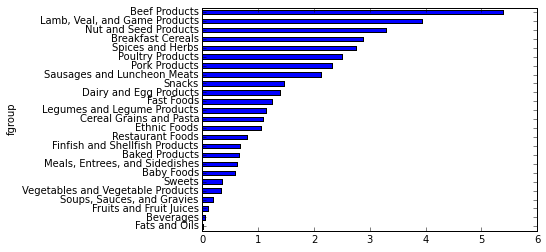

In [301]:
result['Zinc, Zn'].order().plot(kind='barh')

In [306]:
by_nutrient = ndata.groupby(['nutgroup', 'nutrient'])

get_maximum = lambda x: x.xs(x.value.idxmax())
get_minimum = lambda x: x.xs(x.value.idxmin())

max_foods = by_nutrient.apply(get_maximum)[['value', 'food']]

# make the food a little smaller
max_foods.food = max_foods.food.str[:50]

In [307]:
max_foods.ix['Amino Acids']['food']

nutrient
Alanine                           Gelatins, dry powder, unsweetened
Arginine                               Seeds, sesame flour, low-fat
Aspartic acid                                   Soy protein isolate
Cystine                Seeds, cottonseed flour, low fat (glandless)
Glutamic acid                                   Soy protein isolate
Glycine                           Gelatins, dry powder, unsweetened
Histidine                Whale, beluga, meat, dried (Alaska Native)
Hydroxyproline    KENTUCKY FRIED CHICKEN, Fried Chicken, ORIGINA...
Isoleucine        Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Leucine           Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Lysine            Seal, bearded (Oogruk), meat, dried (Alaska Na...
Methionine                    Fish, cod, Atlantic, dried and salted
Phenylalanine     Soy protein isolate, PROTEIN TECHNOLOGIES INTE...
Proline                           Gelatins, dry powder, unsweetened
Serine            Soy protein isolate, 